In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score


from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
files = []
for dirname, _, filenames in os.walk('/kaggle/input/playground-series-s4e5'):
    for filename in filenames:
        print(filename)
        files.append(pd.read_csv(os.path.join(dirname,filename)))

sample_submission.csv
train.csv
test.csv


In [3]:
df_train = files[1]
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
df_test = files[2]
df_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [5]:
df_train.shape

(1117957, 22)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [7]:
df_train.isnull().sum()/len(df_train)*100

id                                 0.0
MonsoonIntensity                   0.0
TopographyDrainage                 0.0
RiverManagement                    0.0
Deforestation                      0.0
Urbanization                       0.0
ClimateChange                      0.0
DamsQuality                        0.0
Siltation                          0.0
AgriculturalPractices              0.0
Encroachments                      0.0
IneffectiveDisasterPreparedness    0.0
DrainageSystems                    0.0
CoastalVulnerability               0.0
Landslides                         0.0
Watersheds                         0.0
DeterioratingInfrastructure        0.0
PopulationScore                    0.0
WetlandLoss                        0.0
InadequatePlanning                 0.0
PoliticalFactors                   0.0
FloodProbability                   0.0
dtype: float64

In [8]:
df_train.duplicated().sum()

0

In [9]:
cols = df_train.select_dtypes(include = "number").columns
cols

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

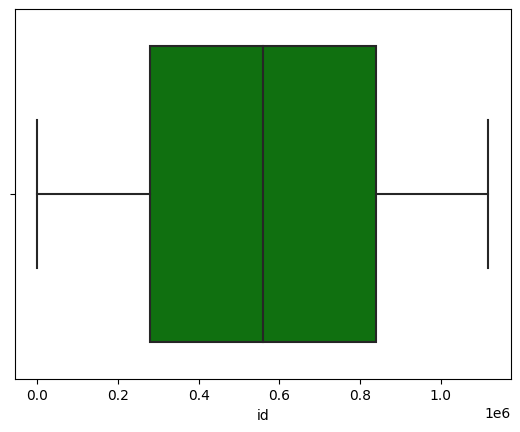

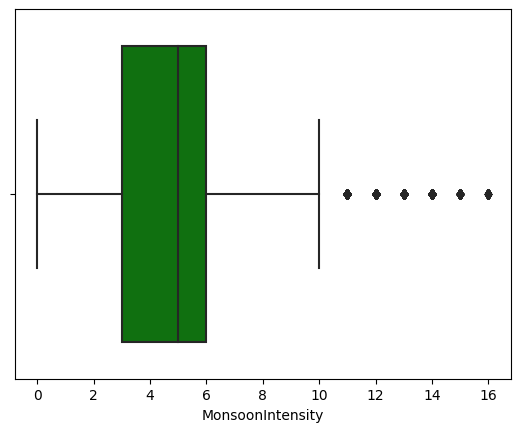

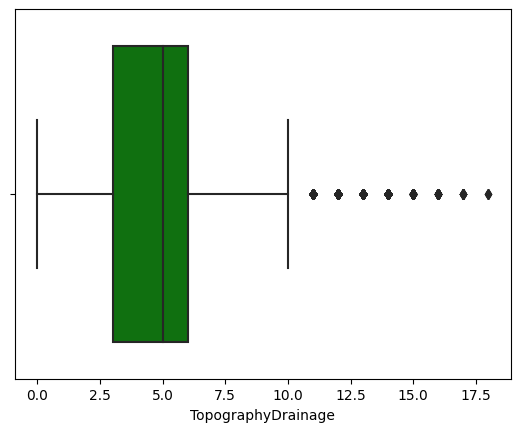

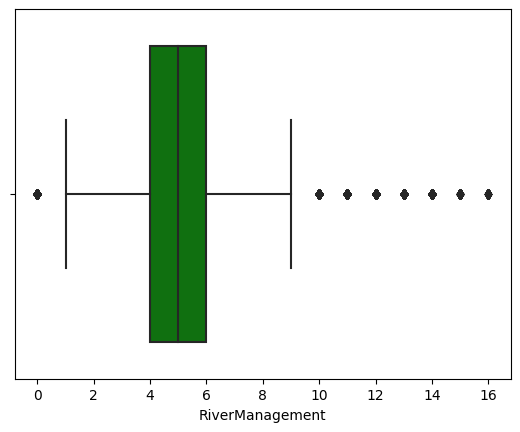

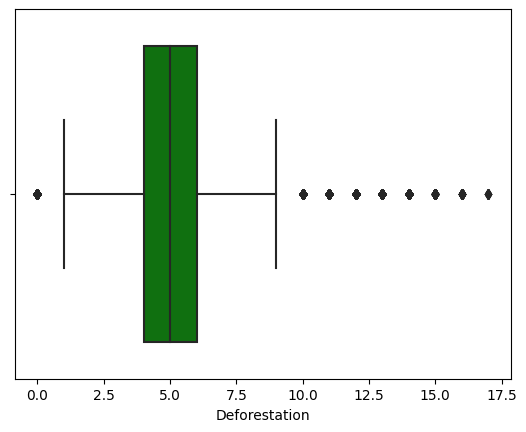

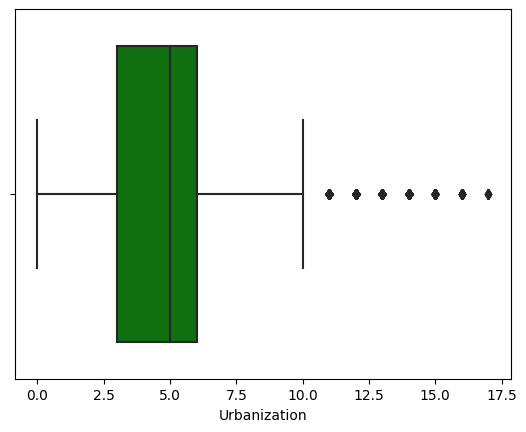

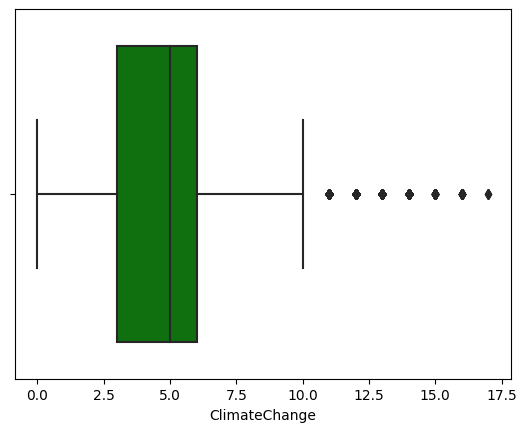

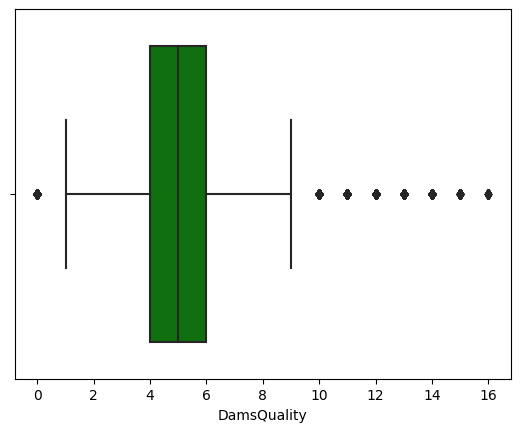

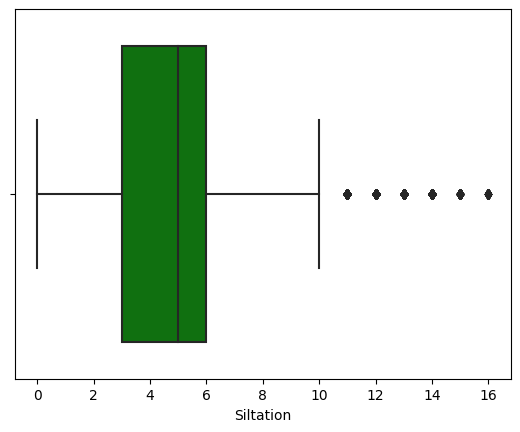

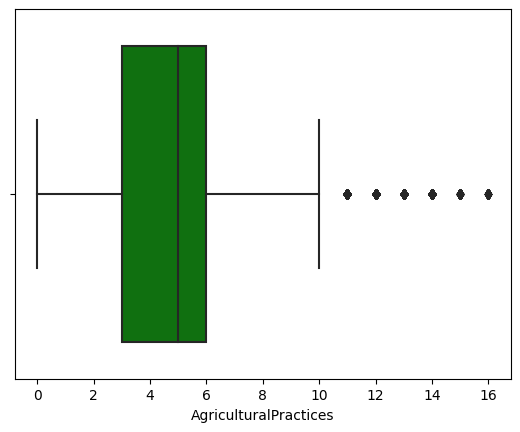

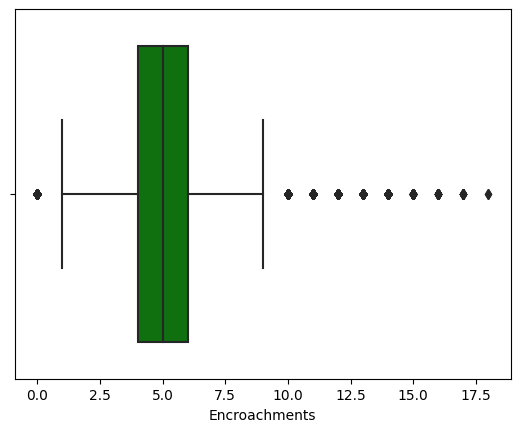

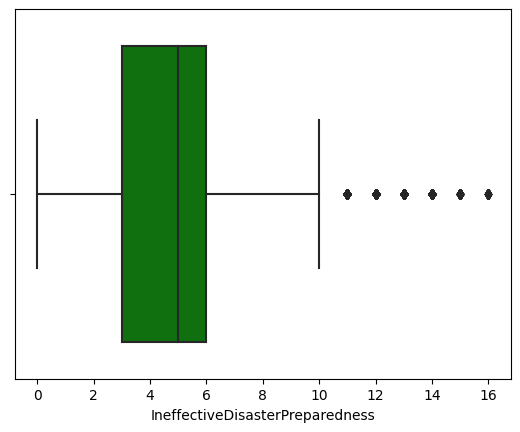

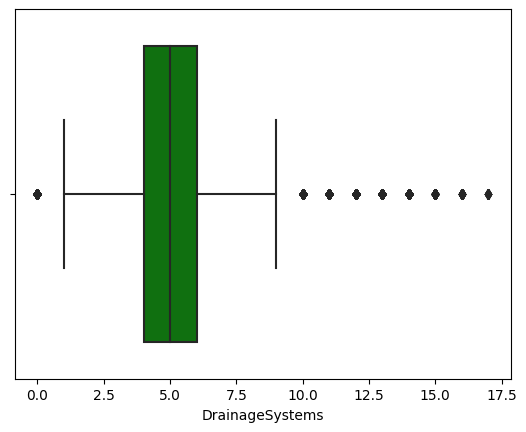

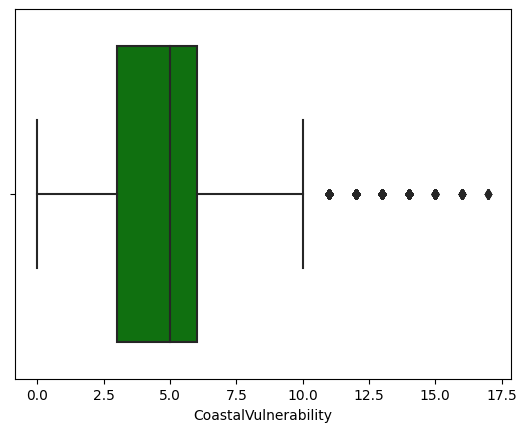

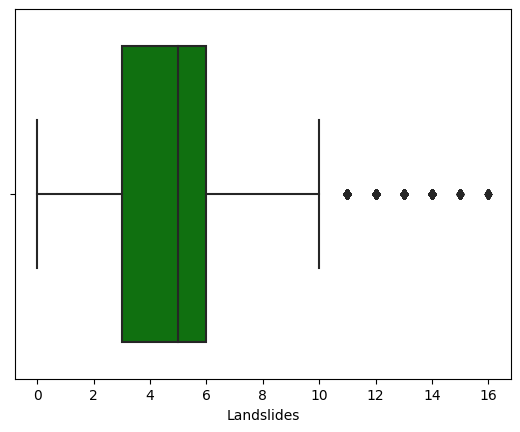

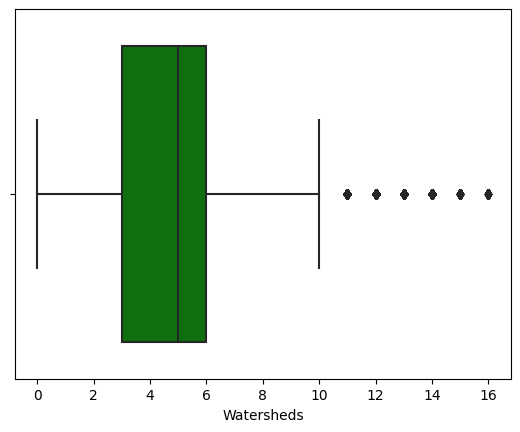

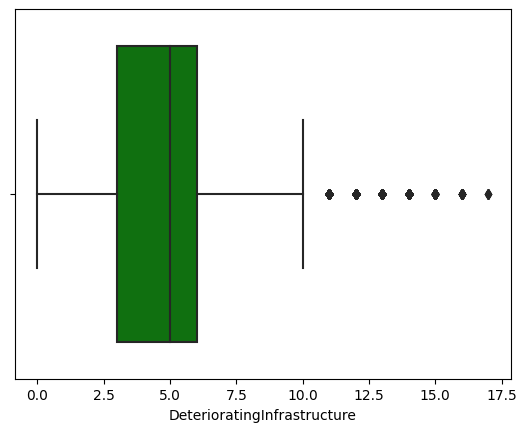

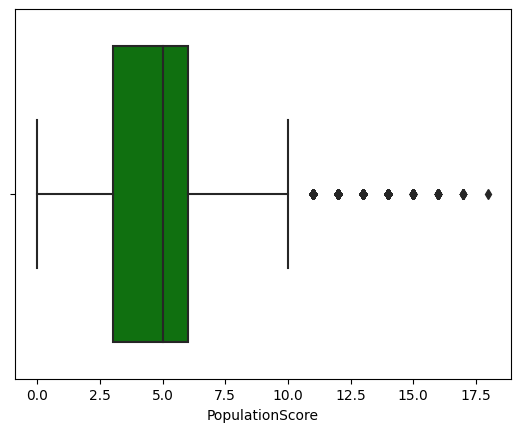

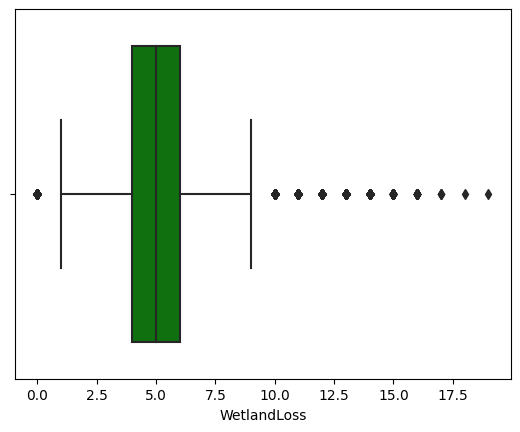

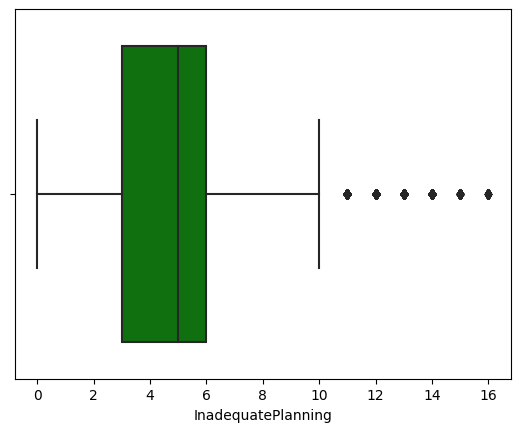

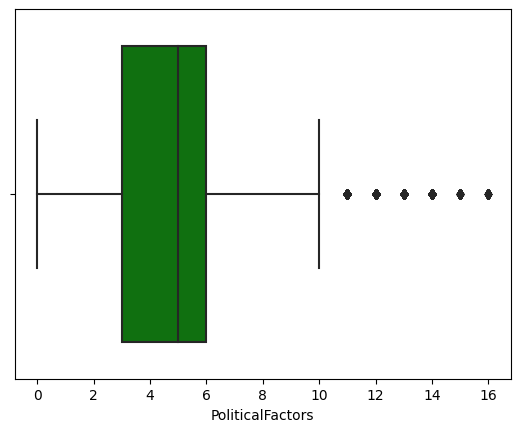

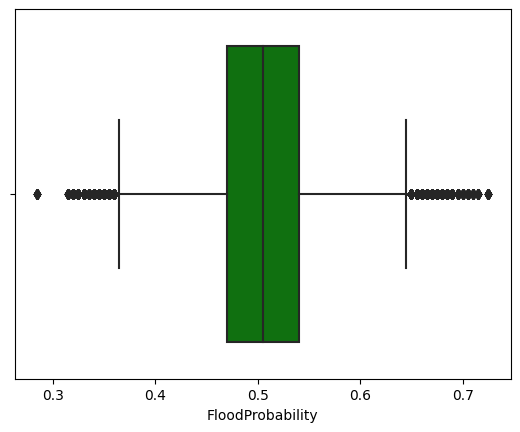

In [10]:
for i in cols:
    sns.boxplot(data = df_train, x = i, color = "green")
    plt.show()

Treatment

In [11]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - (1.5)*iqr
    uw = q3 + (1.5)*iqr
    return lw, uw

In [12]:
for i in cols:
    lw, uw = wisker(df_train[i])
    df_train[i] = np.where(df_train[i] < lw , lw, df_train[i])
    df_train[i] = np.where(df_train[i] > uw , uw, df_train[i])

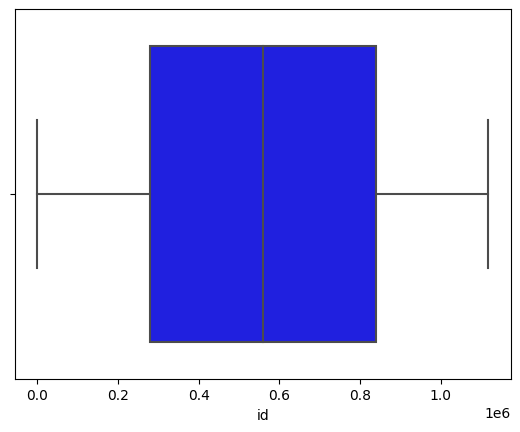

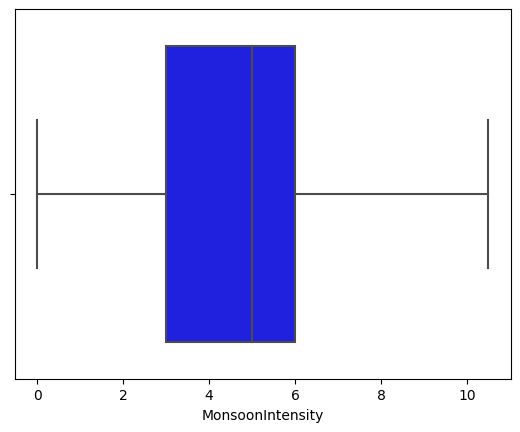

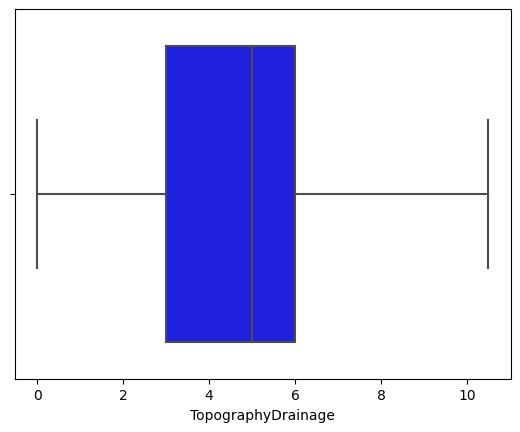

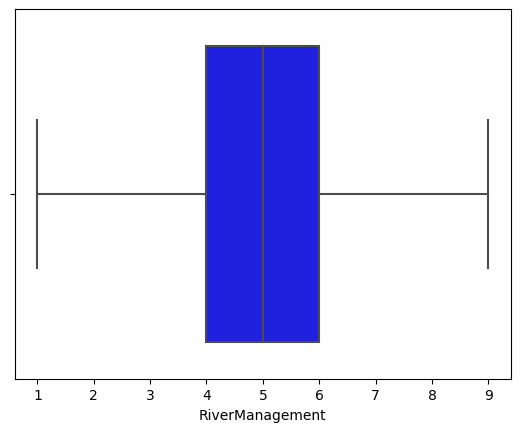

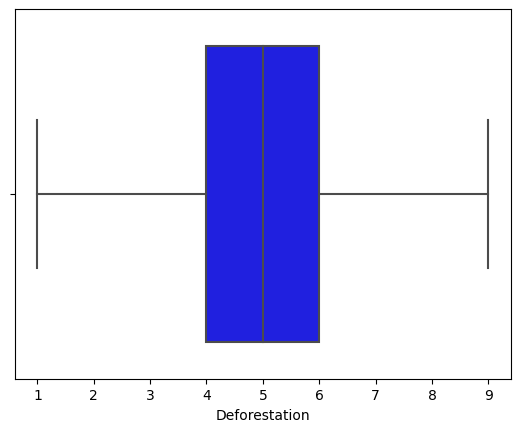

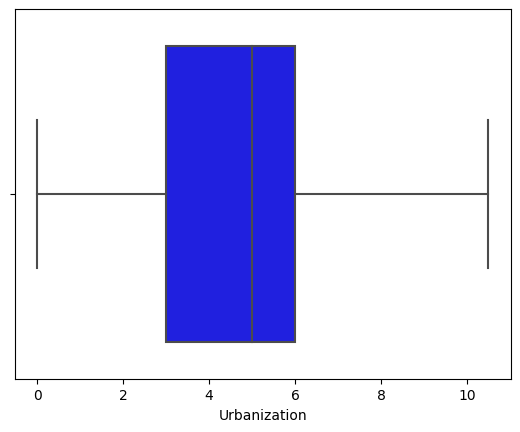

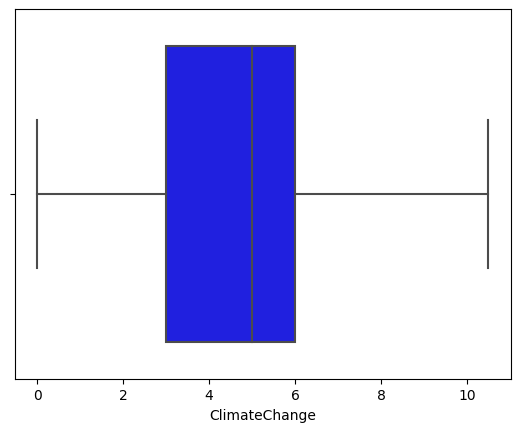

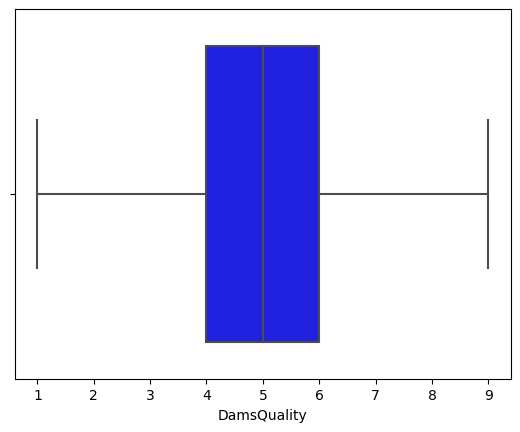

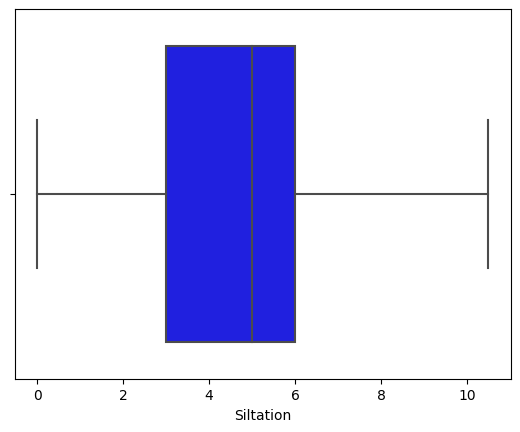

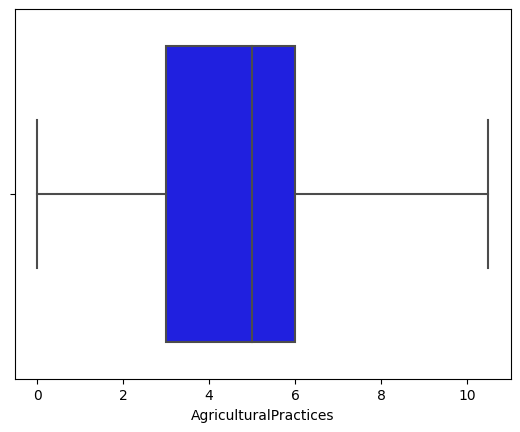

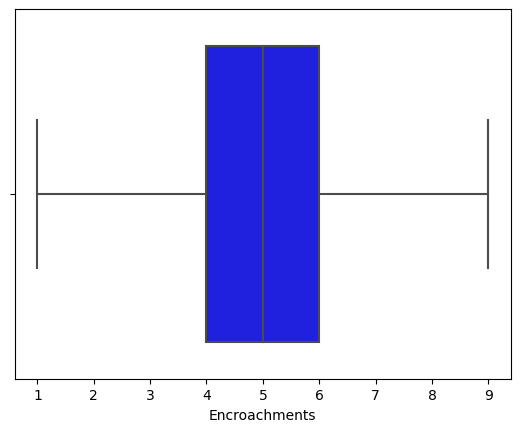

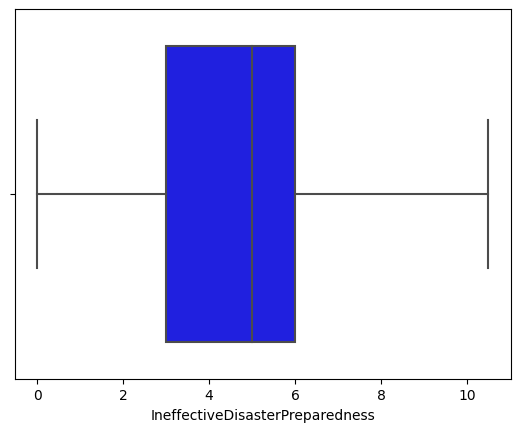

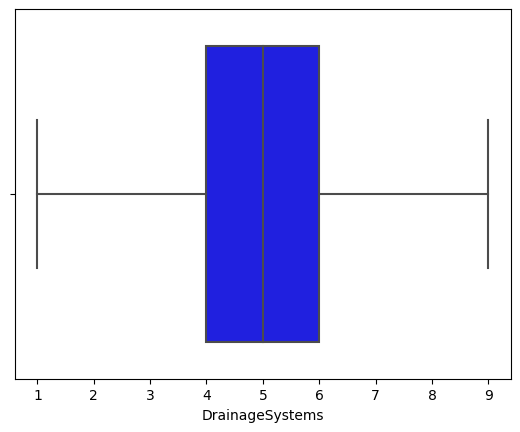

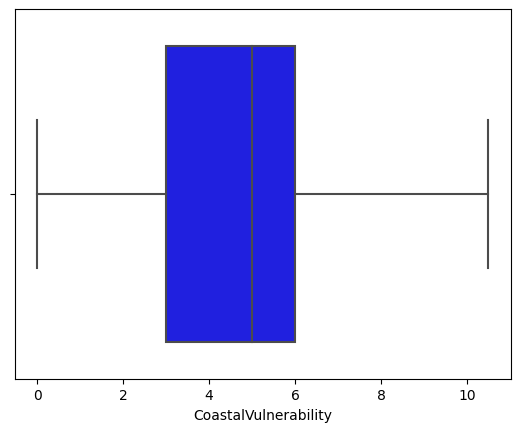

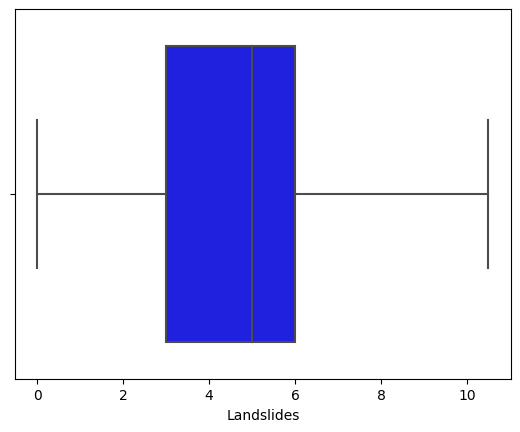

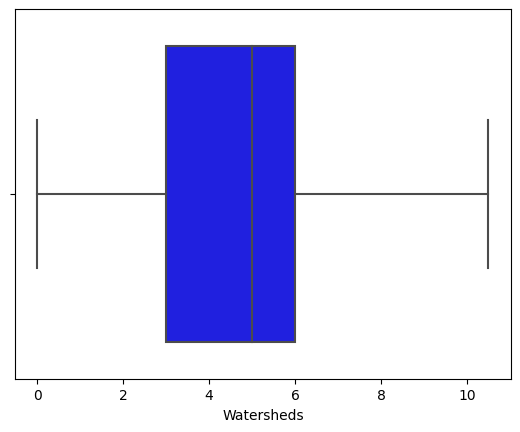

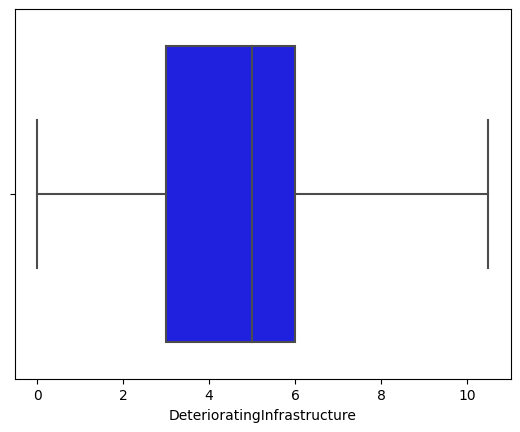

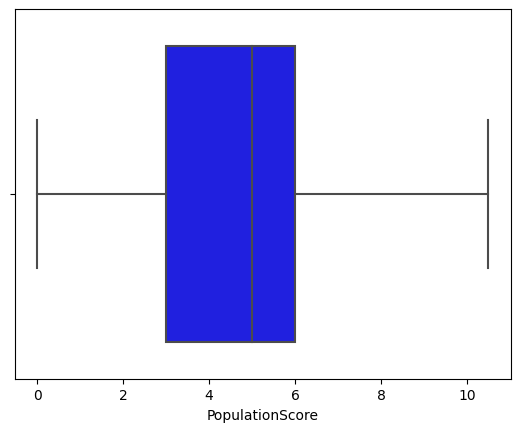

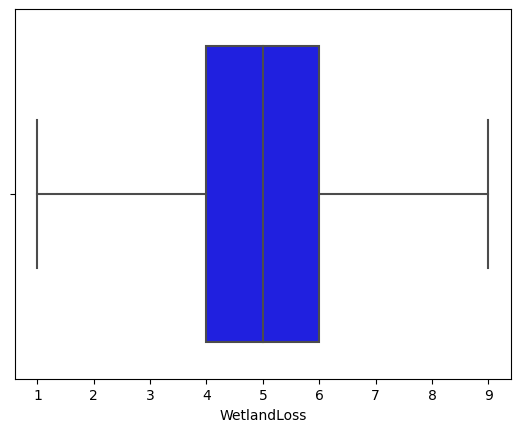

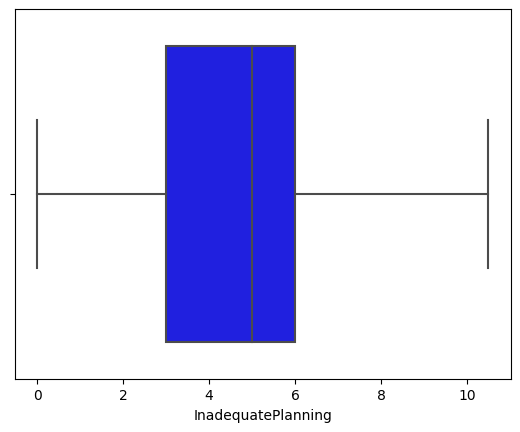

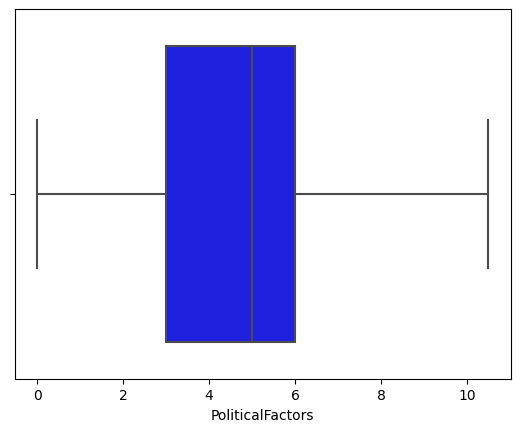

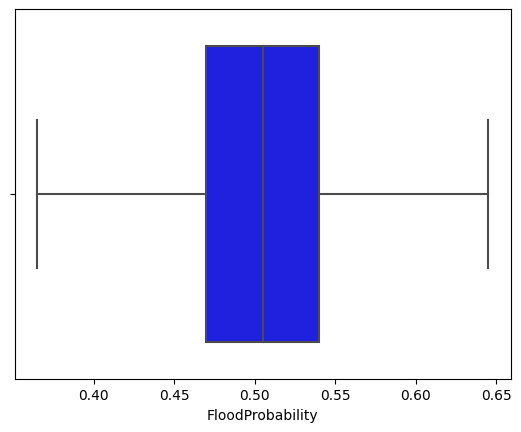

In [13]:
for i in cols:
    sns.boxplot(data = df_train, x = i, color = "blue")
    plt.show()

<Axes: >

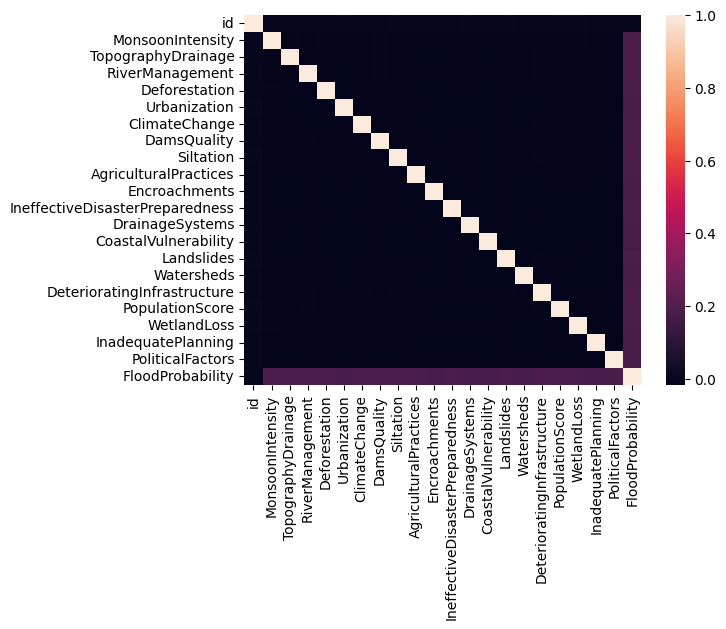

In [14]:
cor = df_train.select_dtypes(include = "number").corr()
sns.heatmap(cor)

In [15]:
correlations = df_train.corrwith(df_train["FloodProbability"])
correlations

id                                -0.000151
MonsoonIntensity                   0.189348
TopographyDrainage                 0.187798
RiverManagement                    0.186980
Deforestation                      0.184059
Urbanization                       0.180697
ClimateChange                      0.184686
DamsQuality                        0.187891
Siltation                          0.186949
AgriculturalPractices              0.183425
Encroachments                      0.178874
IneffectiveDisasterPreparedness    0.183346
DrainageSystems                    0.179022
CoastalVulnerability               0.177802
Landslides                         0.185393
Watersheds                         0.181949
DeterioratingInfrastructure        0.190030
PopulationScore                    0.185825
WetlandLoss                        0.183382
InadequatePlanning                 0.181135
PoliticalFactors                   0.182374
FloodProbability                   1.000000
dtype: float64

In [16]:
df_train_vf = df_train.drop(["id"], axis = 1)
df_train_vf

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5.0,8.0,5.0,8.0,6.0,4.0,4.0,3.0,3.0,4.0,...,5.0,3.0,3.0,5.0,4.0,7.0,5.0,7.0,3.0,0.445
1,6.0,7.0,4.0,4.0,8.0,8.0,3.0,5.0,4.0,6.0,...,7.0,2.0,0.0,3.0,5.0,3.0,3.0,4.0,3.0,0.450
2,6.0,5.0,6.0,7.0,3.0,7.0,1.0,5.0,4.0,5.0,...,7.0,3.0,7.0,5.0,6.0,8.0,2.0,3.0,3.0,0.530
3,3.0,4.0,6.0,5.0,4.0,8.0,4.0,7.0,6.0,8.0,...,2.0,4.0,7.0,4.0,4.0,6.0,5.0,7.0,5.0,0.535
4,5.0,3.0,2.0,6.0,4.0,4.0,3.0,3.0,3.0,3.0,...,2.0,2.0,6.0,6.0,4.0,1.0,2.0,3.0,5.0,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3.0,3.0,4.0,9.0,4.0,5.0,5.0,7.0,10.0,4.0,...,7.0,8.0,7.0,2.0,2.0,1.0,4.0,6.0,4.0,0.495
1117953,2.0,2.0,4.0,3.0,9.0,5.0,8.0,1.0,3.0,5.0,...,9.0,4.0,4.0,3.0,7.0,4.0,9.0,4.0,5.0,0.480
1117954,7.0,3.0,9.0,4.0,6.0,5.0,9.0,1.0,3.0,4.0,...,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,4.0,0.485
1117955,7.0,3.0,3.0,7.0,5.0,2.0,3.0,4.0,6.0,4.0,...,6.0,8.0,5.0,3.0,4.0,6.0,7.0,6.0,4.0,0.495


In [17]:
X = df_train_vf.drop(["FloodProbability"], axis = 1)
X

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5.0,8.0,5.0,8.0,6.0,4.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,5.0,4.0,7.0,5.0,7.0,3.0
1,6.0,7.0,4.0,4.0,8.0,8.0,3.0,5.0,4.0,6.0,9.0,7.0,2.0,0.0,3.0,5.0,3.0,3.0,4.0,3.0
2,6.0,5.0,6.0,7.0,3.0,7.0,1.0,5.0,4.0,5.0,6.0,7.0,3.0,7.0,5.0,6.0,8.0,2.0,3.0,3.0
3,3.0,4.0,6.0,5.0,4.0,8.0,4.0,7.0,6.0,8.0,5.0,2.0,4.0,7.0,4.0,4.0,6.0,5.0,7.0,5.0
4,5.0,3.0,2.0,6.0,4.0,4.0,3.0,3.0,3.0,3.0,5.0,2.0,2.0,6.0,6.0,4.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3.0,3.0,4.0,9.0,4.0,5.0,5.0,7.0,10.0,4.0,3.0,7.0,8.0,7.0,2.0,2.0,1.0,4.0,6.0,4.0
1117953,2.0,2.0,4.0,3.0,9.0,5.0,8.0,1.0,3.0,5.0,5.0,9.0,4.0,4.0,3.0,7.0,4.0,9.0,4.0,5.0
1117954,7.0,3.0,9.0,4.0,6.0,5.0,9.0,1.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,4.0
1117955,7.0,3.0,3.0,7.0,5.0,2.0,3.0,4.0,6.0,4.0,6.0,6.0,8.0,5.0,3.0,4.0,6.0,7.0,6.0,4.0


In [18]:
y = df_train["FloodProbability"].copy()
y

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64

In [19]:
df_test_vf = df_test.drop(["id"], axis = 1)
df_test_vf

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,5,4,8,3,5,4,4,5,5,5,5,6,1,3,5,6,4,4,6,6
745301,4,4,2,12,4,3,4,3,5,5,3,7,4,4,3,5,5,3,5,4
745302,5,7,9,5,5,6,7,5,5,3,6,11,3,11,4,5,9,5,5,4
745303,4,7,6,3,5,2,3,8,6,7,6,6,8,6,2,3,8,7,5,5


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((894365, 20), (223592, 20), (894365,), (223592,))

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
X_norm = scaler.transform(X_train)
X_norm

array([[ 0.04343416, -1.41216468, -0.46892582, ...,  0.54848042,
         2.46920916,  0.51875017],
       [-0.44979194,  0.0399251 ,  1.55708507, ..., -0.97482586,
        -0.45422681,  1.00352216],
       [-1.43624416, -0.44410482,  2.06358779, ..., -0.4670571 ,
         1.4947305 , -1.42033777],
       ...,
       [ 0.04343416,  1.49201488,  0.54407963, ..., -0.4670571 ,
         0.03301252,  0.03397819],
       [ 0.04343416,  0.52395503,  1.05058235, ..., -0.97482586,
        -0.94146614, -0.93556578],
       [ 1.52311248,  1.97604481, -0.46892582, ..., -0.97482586,
        -1.42870546,  0.51875017]])

In [23]:
Xt_norm = scaler.transform(X_test)
Xt_norm

array([[ 0.53666027,  1.00798495,  0.0375769 , ...,  1.56401793,
         0.52025185, -1.42033777],
       [-0.44979194,  1.00798495, -0.46892582, ...,  0.04071166,
         0.03301252,  0.51875017],
       [-0.94301805,  1.00798495,  2.06358779, ...,  0.54848042,
         1.98196983, -0.93556578],
       ...,
       [-1.43624416, -1.41216468, -0.46892582, ...,  1.05624917,
        -0.45422681, -0.93556578],
       [-0.44979194, -0.92813475, -0.46892582, ...,  0.04071166,
        -1.42870546,  1.00352216],
       [ 0.04343416, -0.44410482, -1.98843398, ...,  2.07178669,
         2.46920916, -0.4507938 ]])

In [24]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
def model_score(model):
    scores = cross_val_score(model, X_norm, y_train, cv=kfold, scoring='r2')
    return scores.mean()

In [25]:
%%time
model = CatBoostRegressor(verbose = False, allow_writing_files = False)
model.fit(X_train, y_train)

CPU times: user 5min 51s, sys: 4.08 s, total: 5min 55s
Wall time: 1min 32s


In [26]:
%%time
model_score(model)

CPU times: user 54min 24s, sys: 38 s, total: 55min 2s
Wall time: 15min 27s


0.8413622536328781

In [27]:
preds = model.predict(Xt_norm)
preds

array([0.38959257, 0.36400435, 0.38901697, ..., 0.40591627, 0.40310917,
       0.3901106 ])

In [28]:
preds.shape

(223592,)

In [29]:
preds2 = model.predict(df_test_vf)
preds2

array([0.5741138 , 0.45707529, 0.4599997 , ..., 0.62317099, 0.55164729,
       0.51376335])

In [30]:
preds2.shape

(745305,)

In [31]:
y_test.shape

(223592,)

In [32]:
predictions_df = pd.DataFrame(preds2, columns=['FloodProbability'])
predictions_df.head()

,FloodProbability
0,0.574114
1,0.457075
2,0.460000
3,0.465456
4,0.465581


In [33]:
predictions_df.isnull().sum()/len(predictions_df)*100

FloodProbability    0.0
dtype: float64

In [34]:
predictions_df_f = pd.concat([files[0].iloc[:, 0], predictions_df], axis=1)
predictions_df_f.to_csv('submission.csv', index=False)

In [35]:
sub = pd.read_csv("submission.csv")
sub.head()

,id,FloodProbability
0,1117957,0.574114
1,1117958,0.457075
2,1117959,0.460000
3,1117960,0.465456
4,1117961,0.465581


In [36]:
sub.isnull().sum()/len(sub)*100

id                  0.0
FloodProbability    0.0
dtype: float64